In [15]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow warning logging
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Rescaling, GlobalAveragePooling2D, SpatialDropout2D, LeakyReLU
from tensorflow.keras import regularizers
print(f"Available devices: {[device.name for device in tf.config.list_physical_devices()]}")


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
np.random.seed(42)
tf.random.set_seed(42)
batch_size = 32
img_height = 224
img_width = 224
input_shape = (img_height, img_width, 3)
num_classes = 10
# path = '/content/data/animals10/versions/2' colab path
path = '/home/kep1n/Downloads/data/animals10/versions/2' # local path

In [3]:

# Split the data with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)

# Aggressive augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=0.2,
    brightness_range=[0.6,1.4],
    validation_split=0.2
)

# Create training dataset with augmentation
train_ds = datagen.flow_from_directory(
    os.path.join(path, 'raw-img'),
    subset="training",
    shuffle=True,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Map Italian class names to English
class_names = list(train_ds.class_indices.keys())
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "ragno": "spider"}
class_names = [translate[name] for name in class_names]

# Create validation dataset
val_ds = datagen.flow_from_directory(
    os.path.join(path, 'raw-img'),
    subset="validation",
    shuffle=False,  # Don't shuffle validation
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [ ]:
def create_animals10_model(input_shape, num_classes):
    """
    # Architecture 1
    """
    model = Sequential()

    # Block 1: 32 filters
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 2: 64 filters
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Dense(64, activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 3: 128 filters
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Dense(128, activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Dense layers
    model.add(Flatten())
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

def create_animals10_working_model(input_shape, num_classes):
    """
    # Architecture 2
    """
    model = Sequential([
    # Bloque 1: 32 filtros
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.1),

    # Bloque 2: 64 filtros
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Bloque 3: 128 filtros
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Capas densas
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
    ])

    return model

def create_animals10_working_model_v2(input_shape, num_classes):
    """
    # Architecture 3
    """
    model = Sequential([
    # Bloque 1: 32 filtros
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.1),

    # Bloque 2: 64 filtros
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Bloque 3: 128 filtros
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Bloque 3: 128 filtros
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Capas densas
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
    ])

    return model

def create_animals10_224_final(input_shape=(224,224,3), num_classes=10):
    model = Sequential([
        # BLOQUE 1
        Conv2D(32, (3,3), padding='same', input_shape=input_shape, kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(), Activation('relu'),
        Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(), Activation('relu'),
        MaxPooling2D((2,2)),
        SpatialDropout2D(0.1),
        
        # BLOQUE 2
        Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(), Activation('relu'),
        Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(), Activation('relu'),
        MaxPooling2D((2,2)),
        SpatialDropout2D(0.15),
        
        # BLOQUE 3
        Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(), LeakyReLU(alpha=0.1),
        Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(), LeakyReLU(alpha=0.1),
        MaxPooling2D((2,2)),
        SpatialDropout2D(0.2),
        
        # BLOQUE 4
        Conv2D(192, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(), LeakyReLU(alpha=0.1),
        Conv2D(192, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(), LeakyReLU(alpha=0.1),
        MaxPooling2D((2,2)),
        SpatialDropout2D(0.25),
        
        # BLOQUE 5
        Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(), LeakyReLU(alpha=0.1),
        Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)),
        BatchNormalization(), LeakyReLU(alpha=0.1),
        MaxPooling2D((2,2)),
        SpatialDropout2D(0.3),
        
        # CAPAS DENSAS
        GlobalAveragePooling2D(),
        Dense(256, kernel_regularizer=regularizers.l2(1e-4)), BatchNormalization(), Activation('relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    return model

In [ ]:
create_animals10_modelcallbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6),
    ModelCheckpoint( '../models/best_model_224.h5', monitor='val_accuracy', save_best_only=True, verbose=1, mode='max' )
]
# model = create_animals10_working_model(input_shape, num_classes)
model = create_animals10_model(input_shape, num_classes)
model.summary()


/home/kep1n/.pyenv/versions/ironhack/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/kep1n/.pyenv/versions/ironhack/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_2             │ (None, 112, 112, 32)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_3             │ (None, 56, 56, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 1,947,818 (7.43 MB)

 Trainable params: 1,944,618 (7.42 MB)

 Non-trainable params: 3,200 (12.50 KB)

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002), loss='categorical_crossentropy',metrics=['accuracy'])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
print(f"Model parameters: {model.count_params():,}")
history = model.fit(train_ds, validation_data=val_ds, epochs=35, callbacks=callbacks)

Model parameters: 1,947,818


/home/kep1n/.pyenv/versions/ironhack/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35


I0000 00:00:1761949180.397570   40652 service.cc:148] XLA service 0x7fb79800e250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761949180.397605   40652 service.cc:156]   StreamExecutor device (0): Quadro P2200, Compute Capability 6.1
I0000 00:00:1761949181.780063   40652 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-10-31 23:20:02.039156: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,224,224]{3,2,1,0}, f32[32,32,224,224]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-10-31 23:20:02.873088: E external/local_xla

120/655 ━━━━━━━━━━━━━━━━━━━━ 4:02 454ms/step - accuracy: 0.1497 - loss: 2.8865

2025-10-31 23:21:24.705529: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[19,32,224,224]{3,2,1,0}, f32[19,32,224,224]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-10-31 23:21:24.770941: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.065481507s
Trying algorithm eng0{} for conv (f32[32,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[19,32,224,224]{3,2,1,0}, f32[19,32,224,224]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"cudnn_conv_backend_config":{"act

655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.1814 - loss: 2.6206
Epoch 1: val_accuracy improved from None to 0.25898, saving model to ../models/best_model_224.h5


655/655 ━━━━━━━━━━━━━━━━━━━━ 457s 624ms/step - accuracy: 0.2030 - loss: 2.4688 - val_accuracy: 0.2590 - val_loss: 2.2130 - learning_rate: 0.0010
Epoch 2/35
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.2497 - loss: 2.2477
Epoch 2: val_accuracy improved from 0.25898 to 0.25975, saving model to ../models/best_model_224.h5


655/655 ━━━━━━━━━━━━━━━━━━━━ 373s 569ms/step - accuracy: 0.2708 - loss: 2.1879 - val_accuracy: 0.2597 - val_loss: 2.1325 - learning_rate: 0.0010
Epoch 3/35
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.3208 - loss: 2.0616
Epoch 3: val_accuracy improved from 0.25975 to 0.39163, saving model to ../models/best_model_224.h5


655/655 ━━━━━━━━━━━━━━━━━━━━ 373s 570ms/step - accuracy: 0.3304 - loss: 2.0218 - val_accuracy: 0.3916 - val_loss: 1.8622 - learning_rate: 0.0010
Epoch 4/35
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.3592 - loss: 1.9586
Epoch 4: val_accuracy improved from 0.39163 to 0.43119, saving model to ../models/best_model_224.h5


655/655 ━━━━━━━━━━━━━━━━━━━━ 374s 571ms/step - accuracy: 0.3648 - loss: 1.9348 - val_accuracy: 0.4312 - val_loss: 1.7812 - learning_rate: 0.0010
Epoch 5/35
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.3876 - loss: 1.8675
Epoch 5: val_accuracy did not improve from 0.43119
655/655 ━━━━━━━━━━━━━━━━━━━━ 372s 567ms/step - accuracy: 0.3924 - loss: 1.8513 - val_accuracy: 0.4260 - val_loss: 1.8053 - learning_rate: 0.0010
Epoch 6/35
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.4091 - loss: 1.8072
Epoch 6: val_accuracy improved from 0.43119 to 0.44973, saving model to ../models/best_model_224.h5


655/655 ━━━━━━━━━━━━━━━━━━━━ 373s 570ms/step - accuracy: 0.4122 - loss: 1.8089 - val_accuracy: 0.4497 - val_loss: 1.7584 - learning_rate: 0.0010
Epoch 7/35
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.4217 - loss: 1.7891
Epoch 7: val_accuracy improved from 0.44973 to 0.45241, saving model to ../models/best_model_224.h5


655/655 ━━━━━━━━━━━━━━━━━━━━ 373s 569ms/step - accuracy: 0.4309 - loss: 1.7712 - val_accuracy: 0.4524 - val_loss: 1.7152 - learning_rate: 0.0010
Epoch 8/35
379/655 ━━━━━━━━━━━━━━━━━━━━ 2:07 463ms/step - accuracy: 0.4591 - loss: 1.7379

In [10]:
# model.save('/content/model3_colab_X.keras')
# model.save('/content/model3_colab_X.h5')
model.save('/home/kep1n/Downloads/model4_sunday084.keras')
#model.save('/home/kep1n/Downloads/model4_sunday083.h5')
#model.save_weights('/home/kep1n/Downloads/model4_sunday083.weights.h5')

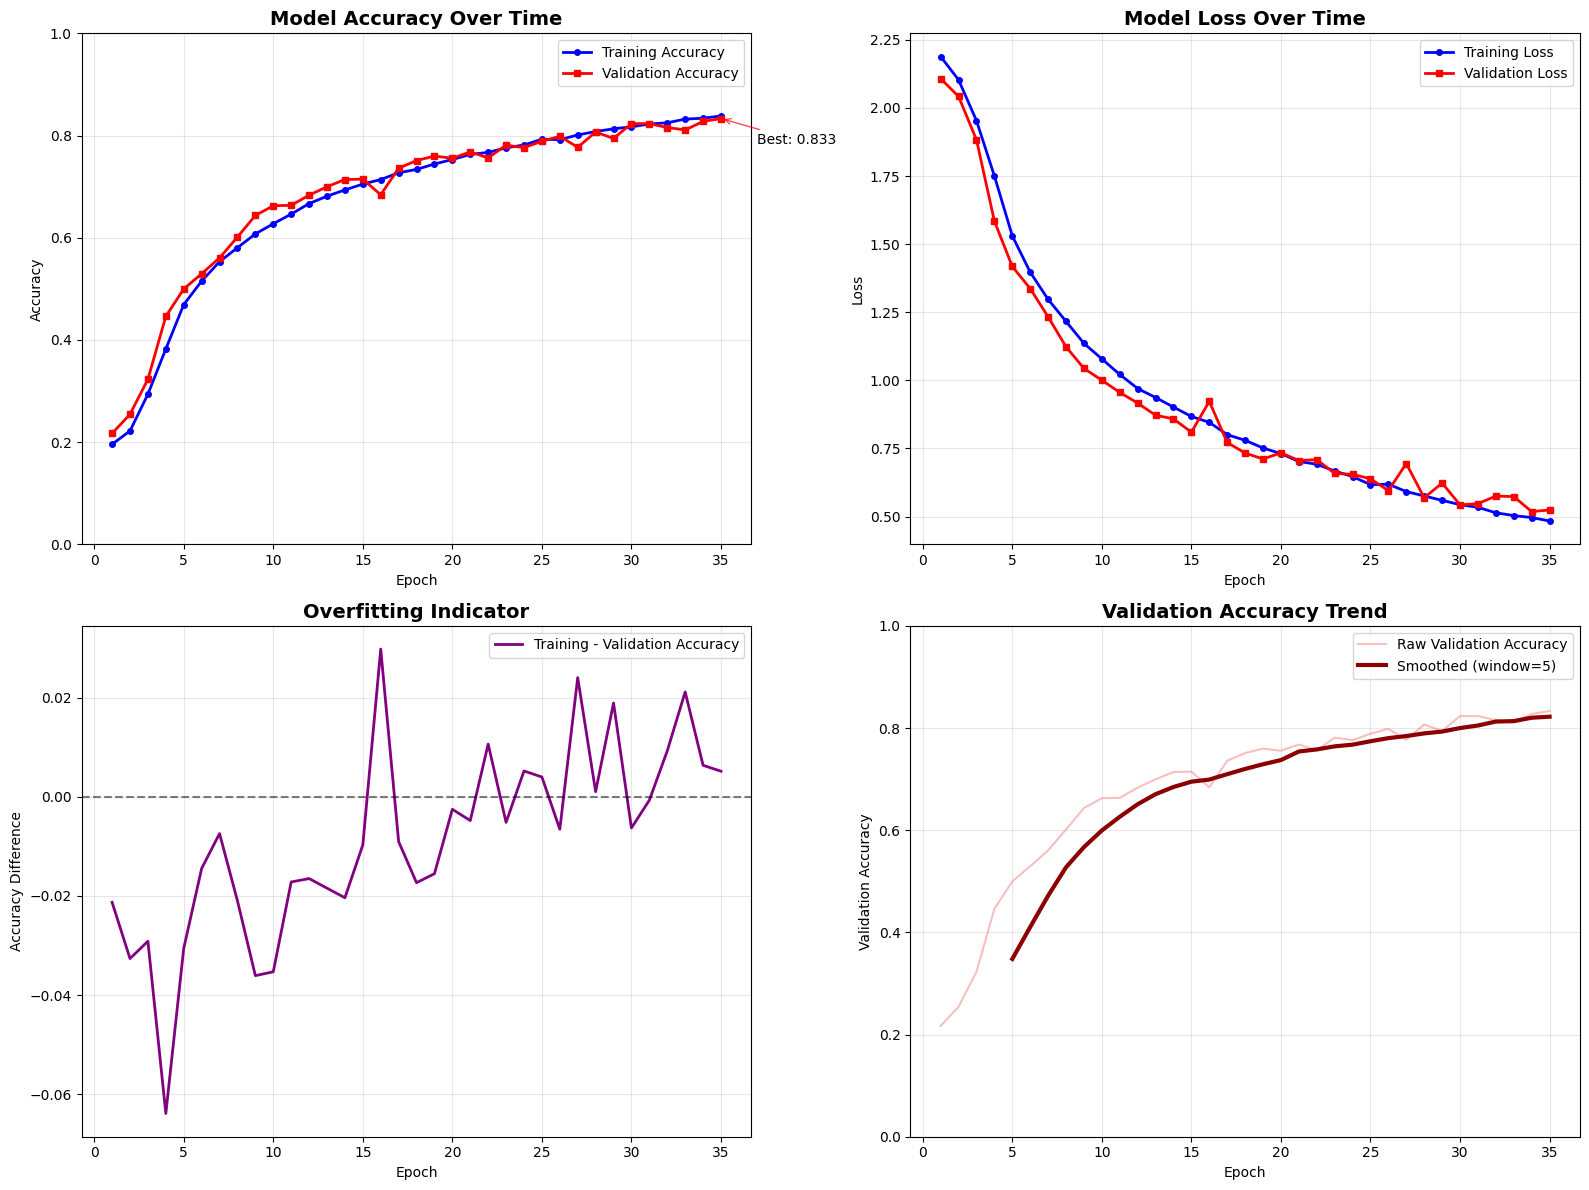


TRAINING HISTORY ANALYSIS
Total epochs trained: 35
Best validation accuracy: 0.8332 at epoch 35
Final training accuracy: 0.8384
Final validation accuracy: 0.8332
Best validation loss: 0.5183
Final validation loss: 0.5241

Overfitting Analysis:
Final accuracy gap: 0.0052
✅ Good generalization (gap ≤ 0.05)
Validation accuracy stability (last 5 epochs std): 0.0080
✅ Training converged well


In [11]:
def plot_training_history(history):
    """
    Plot training and validation metrics with enhanced visualizations.
    """
    # Create a larger figure with more subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # Plot accuracy
    epochs = range(1, len(history.history['accuracy']) + 1)
    ax1.plot(epochs, history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2, marker='o', markersize=4)
    ax1.plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2, marker='s', markersize=4)
    ax1.set_title('Model Accuracy Over Time', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim([0, 1])

    # Add best accuracy annotation
    best_val_acc = max(history.history['val_accuracy'])
    best_val_acc_epoch = history.history['val_accuracy'].index(best_val_acc) + 1
    ax1.annotate(f'Best: {best_val_acc:.3f}',
                xy=(best_val_acc_epoch, best_val_acc),
                xytext=(best_val_acc_epoch + 2, best_val_acc - 0.05),
                arrowprops=dict(arrowstyle='->', color='red', alpha=0.7))

    # Plot loss
    ax2.plot(epochs, history.history['loss'], 'b-', label='Training Loss', linewidth=2, marker='o', markersize=4)
    ax2.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss', linewidth=2, marker='s', markersize=4)
    ax2.set_title('Model Loss Over Time', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Plot learning rate (if available)
    if 'lr' in history.history:
        ax3.plot(epochs, history.history['lr'], 'g-', label='Learning Rate', linewidth=2)
        ax3.set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Epoch')
        ax3.set_ylabel('Learning Rate')
        ax3.set_yscale('log')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
    else:
        # Plot accuracy difference (overfitting indicator)
        acc_diff = np.array(history.history['accuracy']) - np.array(history.history['val_accuracy'])
        ax3.plot(epochs, acc_diff, 'purple', label='Training - Validation Accuracy', linewidth=2)
        ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        ax3.set_title('Overfitting Indicator', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Epoch')
        ax3.set_ylabel('Accuracy Difference')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

    # Plot smoothed validation accuracy trend
    if len(history.history['val_accuracy']) > 5:
        # Simple moving average
        window_size = min(5, len(history.history['val_accuracy']) // 3)
        val_acc_smooth = np.convolve(history.history['val_accuracy'],
                                   np.ones(window_size)/window_size, mode='valid')
        smooth_epochs = range(window_size, len(history.history['val_accuracy']) + 1)

        ax4.plot(epochs, history.history['val_accuracy'], 'lightcoral', alpha=0.5, label='Raw Validation Accuracy')
        ax4.plot(smooth_epochs, val_acc_smooth, 'darkred', linewidth=3, label=f'Smoothed (window={window_size})')
        ax4.set_title('Validation Accuracy Trend', fontsize=14, fontweight='bold')
        ax4.set_xlabel('Epoch')
        ax4.set_ylabel('Validation Accuracy')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        ax4.set_ylim([0, 1])
    else:
        # If not enough epochs, show final metrics summary
        ax4.text(0.1, 0.8, 'Training Summary', fontsize=16, fontweight='bold', transform=ax4.transAxes)
        ax4.text(0.1, 0.6, f'Epochs: {len(epochs)}', fontsize=12, transform=ax4.transAxes)
        ax4.text(0.1, 0.5, f'Best Val Acc: {best_val_acc:.4f}', fontsize=12, transform=ax4.transAxes)
        ax4.text(0.1, 0.4, f'Final Train Acc: {history.history["accuracy"][-1]:.4f}', fontsize=12, transform=ax4.transAxes)
        ax4.text(0.1, 0.3, f'Final Val Acc: {history.history["val_accuracy"][-1]:.4f}', fontsize=12, transform=ax4.transAxes)
        ax4.set_xlim(0, 1)
        ax4.set_ylim(0, 1)
        ax4.axis('off')

    plt.tight_layout()
    plt.show()

    # Print comprehensive metrics
    print("\n" + "="*60)
    print("TRAINING HISTORY ANALYSIS")
    print("="*60)
    print(f"Total epochs trained: {len(epochs)}")
    print(f"Best validation accuracy: {best_val_acc:.4f} at epoch {best_val_acc_epoch}")
    print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print(f"Best validation loss: {min(history.history['val_loss']):.4f}")
    print(f"Final validation loss: {history.history['val_loss'][-1]:.4f}")

    # Calculate overfitting metrics
    final_gap = history.history['accuracy'][-1] - history.history['val_accuracy'][-1]
    print(f"\nOverfitting Analysis:")
    print(f"Final accuracy gap: {final_gap:.4f}")
    if final_gap > 0.1:
        print("⚠️  Potential overfitting detected (gap > 0.1)")
    elif final_gap > 0.05:
        print("⚡ Mild overfitting (gap > 0.05)")
    else:
        print("✅ Good generalization (gap ≤ 0.05)")

    # Training stability
    last_5_val_acc = history.history['val_accuracy'][-5:] if len(history.history['val_accuracy']) >= 5 else history.history['val_accuracy']
    val_acc_std = np.std(last_5_val_acc)
    print(f"Validation accuracy stability (last 5 epochs std): {val_acc_std:.4f}")

    if val_acc_std < 0.01:
        print("✅ Training converged well")
    elif val_acc_std < 0.02:
        print("⚡ Training mostly stable")
    else:
        print("⚠️  Training still fluctuating")

    print("="*60)

# Plot the training history
plot_training_history(history)

In [8]:
# Evaluate on validation set (since we don't have a separate test set)
custom_model = keras.models.load_model('/home/kep1n/Downloads/model4_sunday083.keras')
val_ds.reset()
val_loss, val_accuracy = custom_model.evaluate(val_ds, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

# Generate predictions on validation set
print("Generating predictions...")
val_ds.reset()
y_pred = custom_model.predict(val_ds, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels from validation generator
val_ds.reset()
y_true_classes = []
for i in range(len(val_ds)):
    batch_images, batch_labels = next(val_ds)
    batch_true_classes = np.argmax(batch_labels, axis=1)
    y_true_classes.extend(batch_true_classes)

y_true_classes = np.array(y_true_classes)

# Ensure we have the same number of predictions and true labels
min_length = min(len(y_pred_classes), len(y_true_classes))
y_pred_classes = y_pred_classes[:min_length]
y_true_classes = y_true_classes[:min_length]

print(f"Number of samples evaluated: {min_length}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# Reset generator
val_ds.reset()

Validation Accuracy: 0.8286
Validation Loss: 0.5277
Generating predictions...
82/82 ━━━━━━━━━━━━━━━━━━━━ 31s 364ms/step
Number of samples evaluated: 2614

Classification Report:
              precision    recall  f1-score   support

        cane       0.78      0.87      0.83       486
     cavallo       0.81      0.78      0.80       262
    elefante       0.81      0.82      0.81       144
    farfalla       0.94      0.77      0.85       211
     gallina       0.94      0.80      0.86       309
       gatto       0.79      0.84      0.82       166
       mucca       0.68      0.86      0.76       186
      pecora       0.88      0.70      0.78       182
       ragno       0.92      0.93      0.92       482
  scoiattolo       0.74      0.78      0.76       186

    accuracy                           0.83      2614
   macro avg       0.83      0.82      0.82      2614
weighted avg       0.84      0.83      0.83      2614



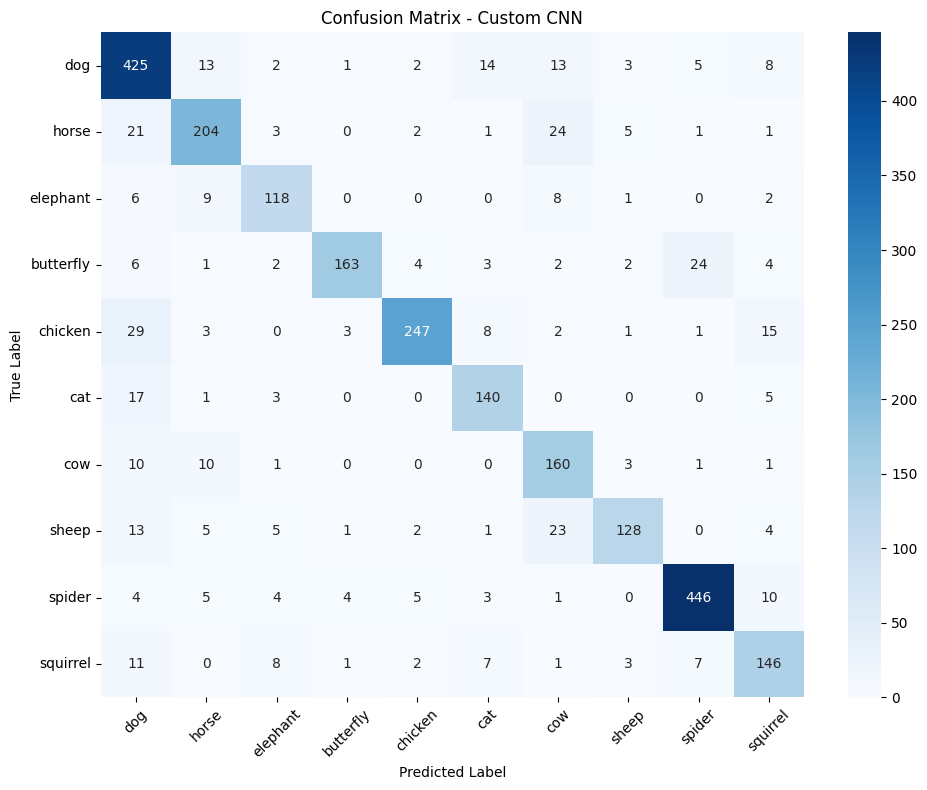


Per-class Accuracy:
dog: 0.8745
horse: 0.7786
elephant: 0.8194
butterfly: 0.7725
chicken: 0.7994
cat: 0.8434
cow: 0.8602
sheep: 0.7033
spider: 0.9253
squirrel: 0.7849


In [14]:
# Generate and plot confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Custom CNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate per-class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
print("\nPer-class Accuracy:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {class_accuracy[i]:.4f}")

In [1]:
import os
path = r'E:\SynologyDrive\ironhack\week_7\day_1\image_class_project_ih\data\animals10\versions\2\raw-img'
files = [os.path.join(root, file) for root, folders, files in os.walk(path) for file in files]

In [5]:
from PIL import Image
a = set()
for f in files:
    im = Image.open(f)
    a.add(im.size)

In [10]:
for el in a:
    print(el)

(449, 640)
(640, 320)
(300, 270)
(640, 329)
(300, 279)
(181, 300)
(640, 576)
(278, 251)
(640, 347)
(187, 240)
(300, 108)
(290, 225)
(640, 356)
(282, 221)
(300, 117)
(300, 126)
(300, 135)
(238, 300)
(249, 300)
(300, 144)
(391, 640)
(286, 218)
(276, 183)
(296, 250)
(160, 240)
(640, 450)
(243, 256)
(640, 459)
(468, 640)
(4074, 2716)
(2848, 4272)
(640, 468)
(150, 223)
(236, 226)
(300, 229)
(640, 477)
(231, 269)
(300, 238)
(200, 300)
(211, 300)
(222, 300)
(615, 640)
(300, 247)
(593, 640)
(258, 241)
(5184, 3456)
(300, 256)
(220, 147)
(640, 315)
(300, 265)
(272, 194)
(219, 160)
(279, 300)
(640, 571)
(640, 342)
(173, 300)
(200, 165)
(300, 112)
(216, 289)
(300, 121)
(4256, 2832)
(280, 292)
(300, 130)
(6720, 4480)
(241, 300)
(230, 300)
(640, 436)
(634, 640)
(153, 187)
(640, 445)
(220, 277)
(225, 203)
(528, 640)
(640, 454)
(264, 194)
(640, 463)
(300, 224)
(246, 253)
(640, 472)
(280, 166)
(300, 233)
(211, 295)
(300, 242)
(203, 300)
(300, 251)
(192, 300)
(6016, 4000)
(640, 301)
(300, 260)
(479, 640

In [8]:
h

(6720, 60)

In [9]:
w

(6000, 57)